# Body Fat Prediction Dataset

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
import pickle

In [1609]:
data = df = pd.read_csv('combined_bodyfat_dataset.csv')
df = pd.DataFrame (data)
df

,BodyFat,Weight,Height,Chest,Abdomen,Hip,Thigh,Biceps
0,12.3,69.97,1.72,93.1,85.2,94.5,59.0,32.0
1,6.1,78.59,1.84,93.6,83.0,98.7,58.7,30.5
2,25.3,69.85,1.68,95.8,87.9,99.2,59.6,28.8
3,10.4,83.80,1.84,101.8,86.4,101.2,60.1,32.4
4,28.7,83.58,1.81,97.3,100.0,101.9,63.2,32.2
...,...,...,...,...,...,...,...,...
2183,22.6,62.10,163.60,89.9,81.8,96.8,51.8,26.6
2184,20.4,68.40,184.60,94.3,81.4,91.6,51.6,31.3
2185,28.3,74.40,181.10,105.0,90.4,100.7,56.8,28.6
2186,31.4,79.10,168.40,91.4,93.1,104.5,62.8,27.4


# Data Preprocessing

In [1610]:
df.columns

Index(['BodyFat', 'Weight', 'Height', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Biceps'],
      dtype='object')

In [1611]:
df.head()

,BodyFat,Weight,Height,Chest,Abdomen,Hip,Thigh,Biceps
0,12.3,69.97,1.72,93.1,85.2,94.5,59.0,32.0
1,6.1,78.59,1.84,93.6,83.0,98.7,58.7,30.5
2,25.3,69.85,1.68,95.8,87.9,99.2,59.6,28.8
3,10.4,83.80,1.84,101.8,86.4,101.2,60.1,32.4
4,28.7,83.58,1.81,97.3,100.0,101.9,63.2,32.2


In [1612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  2188 non-null   float64
 1   Weight   2188 non-null   float64
 2   Height   2188 non-null   float64
 3   Chest    2188 non-null   float64
 4   Abdomen  2188 non-null   float64
 5   Hip      2188 non-null   float64
 6   Thigh    2188 non-null   float64
 7   Biceps   2188 non-null   float64
dtypes: float64(8)
memory usage: 136.9 KB


In [1613]:
df.describe()

,BodyFat,Weight,Height,Chest,Abdomen,Hip,Thigh,Biceps
count,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000
mean,23.184154,84.516632,125.616154,96.594653,88.750548,99.962888,57.155302,29.612340
std,6.975504,37.766235,69.855507,9.281699,12.088640,6.387999,5.866324,4.133845
min,0.000000,29.300000,0.750000,43.000000,58.000000,79.800000,38.000000,16.800000
25%,18.787500,63.600000,69.750000,89.800000,80.675000,95.800000,53.000000,26.500000
50%,23.600000,73.700000,164.600000,96.400000,89.300000,99.900000,57.100000,29.600000
75%,27.900000,87.225000,174.425000,102.700000,97.225000,104.000000,61.100000,32.525000
max,47.500000,363.150000,197.000000,136.200000,148.100000,147.700000,87.300000,45.000000


In [1614]:
df.isnull().sum()

BodyFat    0
Weight     0
Height     0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Biceps     0
dtype: int64

In [1615]:
df.duplicated().sum()

np.int64(0)

In [1616]:
def describe(df):
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        
        if df[item].dtypes == 'float64' or df[item].dtypes == 'int64':
            min_.append(df[item].min())
            max_.append(df[item].max())
        else: 
            min_.append('Str')
            max_.append('Str')
            
    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing values' : missing,
        'Min': min_,
        'Max': max_
    })
    
    return output

In [1617]:
Styles = [dict(selector = 'caption',
              props = [('color', 'darkslategray'),
                      ('text-align', 'center'),
                      ('font-size', '15pt')])]

In [1618]:
df_ = describe(df)
df_ = df_.style.set_caption('Table 1 : overview of dataset').set_table_styles(Styles)
df_

,variable,dtype,count,unique,missing values,Min,Max
0,BodyFat,float64,2188,461,0,0.000000,47.500000
1,Weight,float64,2188,944,0,29.300000,363.150000
2,Height,float64,2188,495,0,0.750000,197.000000
3,Chest,float64,2188,404,0,43.000000,136.200000
4,Abdomen,float64,2188,479,0,58.000000,148.100000
5,Hip,float64,2188,300,0,79.800000,147.700000
6,Thigh,float64,2188,274,0,38.000000,87.300000
7,Biceps,float64,2188,207,0,16.800000,45.000000


In [1619]:
# Convert height to meters (some rows are in cm)
df['Height'] = df['Height'].apply(lambda x: x/100 if x > 3 else x)

In [1620]:
#Insert BMI columns to the dataset:
df['BMI'] = (df['Weight'] / (df['Height']**2)).round()
df

,BodyFat,Weight,Height,Chest,Abdomen,Hip,Thigh,Biceps,BMI
0,12.3,69.97,1.720,93.1,85.2,94.5,59.0,32.0,24.0
1,6.1,78.59,1.840,93.6,83.0,98.7,58.7,30.5,23.0
2,25.3,69.85,1.680,95.8,87.9,99.2,59.6,28.8,25.0
3,10.4,83.80,1.840,101.8,86.4,101.2,60.1,32.4,25.0
4,28.7,83.58,1.810,97.3,100.0,101.9,63.2,32.2,26.0
...,...,...,...,...,...,...,...,...,...
2183,22.6,62.10,1.636,89.9,81.8,96.8,51.8,26.6,23.0
2184,20.4,68.40,1.846,94.3,81.4,91.6,51.6,31.3,20.0
2185,28.3,74.40,1.811,105.0,90.4,100.7,56.8,28.6,23.0
2186,31.4,79.10,1.684,91.4,93.1,104.5,62.8,27.4,28.0


In [1621]:
# Remove impossible body fat values
df = df[(df['BodyFat'] > 3) & (df['BodyFat'] < 60)].copy()

In [1622]:
# Feature Engineering
df['Waist_Hip_Ratio'] = df['Abdomen'] / df['Hip']
df['Chest_Height_Ratio'] = df['Chest'] / df['Height']
df['Thigh_Height_Ratio'] = df['Thigh'] / df['Height']

In [1623]:
df.describe()

,BodyFat,Weight,Height,Chest,Abdomen,Hip,Thigh,Biceps,BMI,Waist_Hip_Ratio,Chest_Height_Ratio,Thigh_Height_Ratio
count,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000
mean,23.244514,84.484895,1.599378,96.619844,88.787168,99.993034,57.173236,29.617782,64.016499,0.886934,66.164923,39.147453
std,6.888962,37.761210,0.333932,9.277042,12.082057,6.368618,5.862145,4.136483,119.180123,0.098307,29.219052,17.355962
min,3.700000,29.300000,0.295000,43.000000,58.000000,79.800000,38.000000,16.800000,11.000000,0.621905,25.767327,21.682072
25%,18.847500,63.600000,1.617985,89.825000,80.700000,95.800000,53.000000,26.525000,22.000000,0.820756,52.998331,31.206050
50%,23.600000,73.700000,1.698000,96.500000,89.300000,99.900000,57.100000,29.600000,25.000000,0.895225,56.738432,33.562053
75%,27.975000,87.150000,1.774000,102.700000,97.300000,104.000000,61.100000,32.600000,29.000000,0.958751,60.986105,36.518136
max,47.500000,363.150000,1.970000,136.200000,148.100000,147.700000,87.300000,45.000000,2356.000000,1.146390,359.322034,239.322034


# EDA (Exploratory Data Analysis)

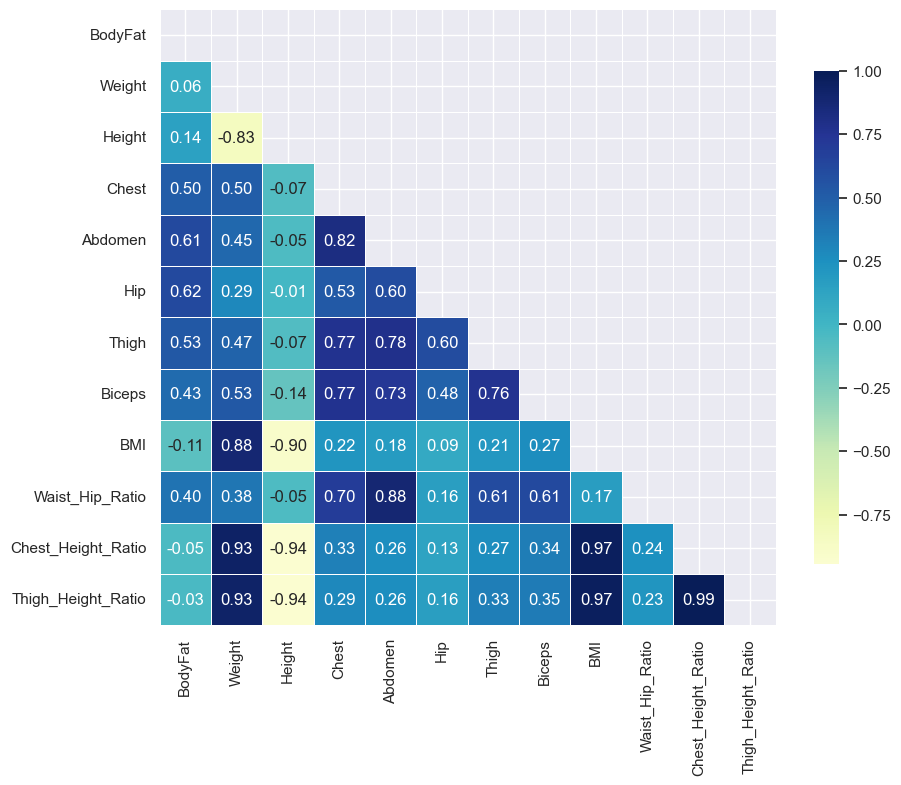

In [1624]:
corr = df.corr(method = 'pearson')

sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
sns.heatmap(corr, mask = np.triu(np.ones_like(corr)),cmap='YlGnBu', vmax=1, center=0,
           square=True, linewidth=.5, cbar_kws={'shrink':.8},annot=True, fmt='.2f')
plt.show()


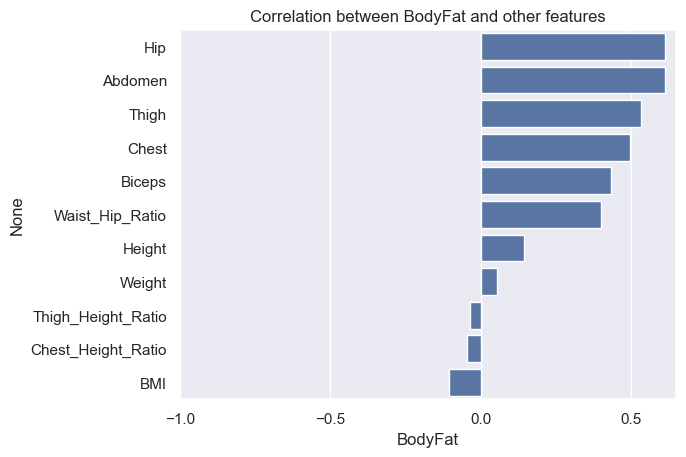

In [1625]:
corr = df.corr()
corr = corr.BodyFat
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr,y=cr.index)
plt.xticks(np.arange(-1,1,.5))
plt.title('Correlation between BodyFat and other features')
plt.show()

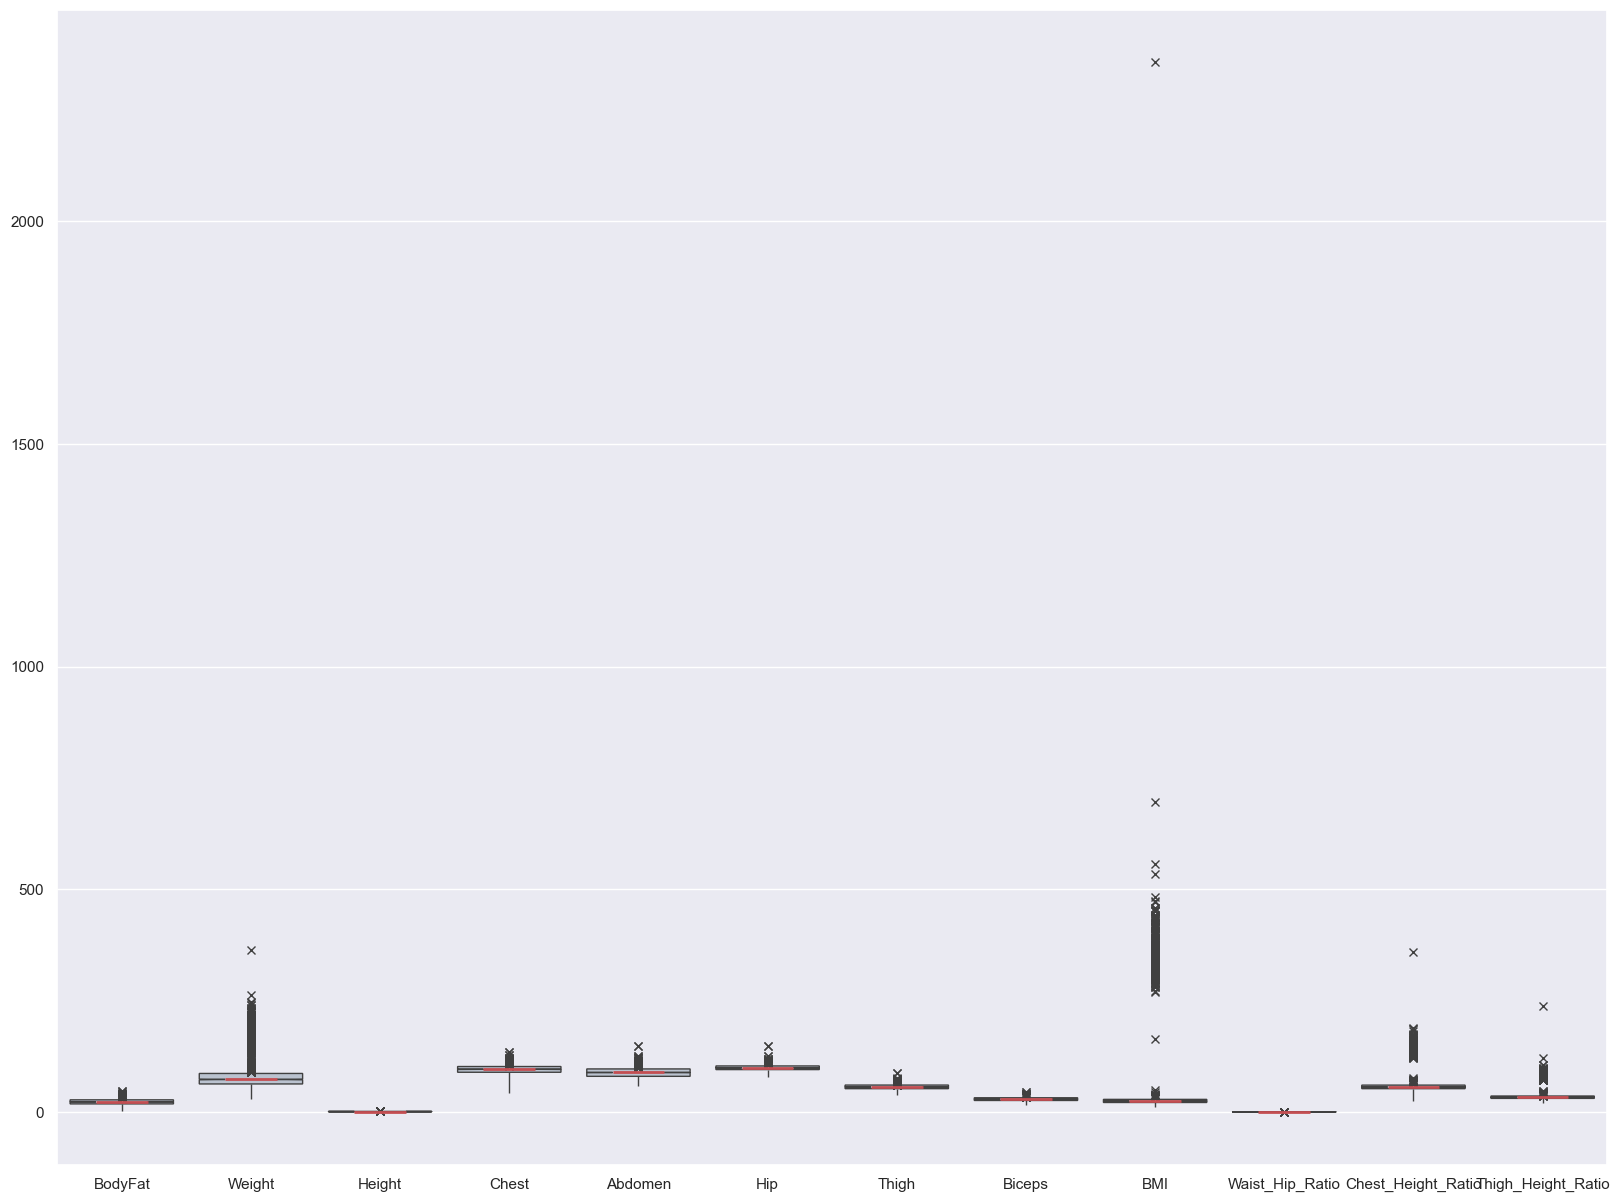

In [1626]:
plt.figure(figsize=(20,15))
sns.boxplot (data= df,notch=True,showcaps=False,
             flierprops={'marker':'x'},
             boxprops={'facecolor':(.3,.4,.5,.3)},
             medianprops={"color": "r", "linewidth": 2},whis=(0,80))
plt.show()

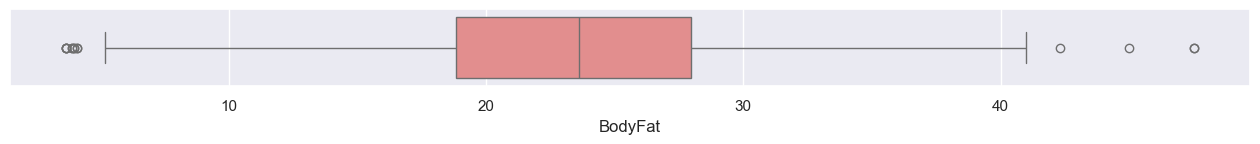

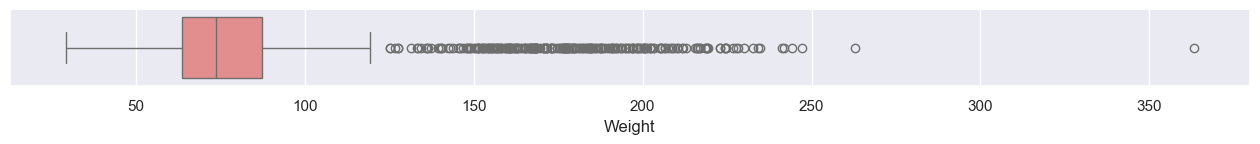

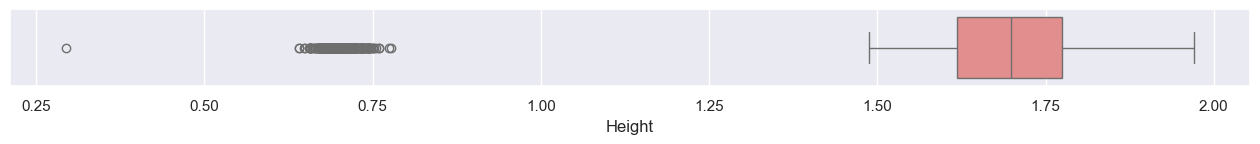

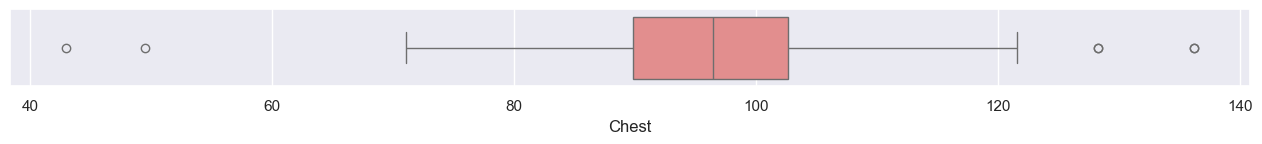

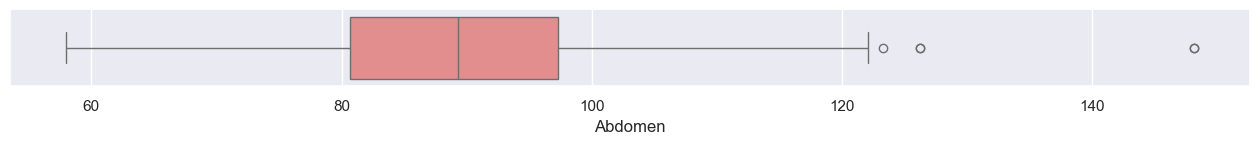

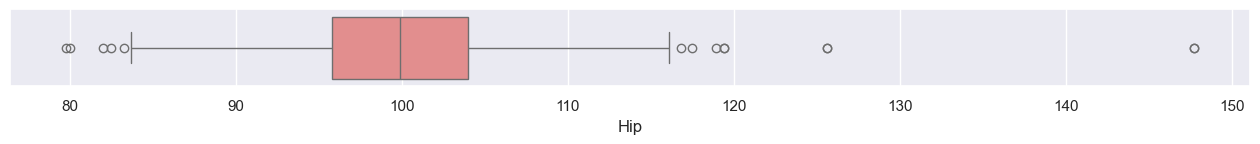

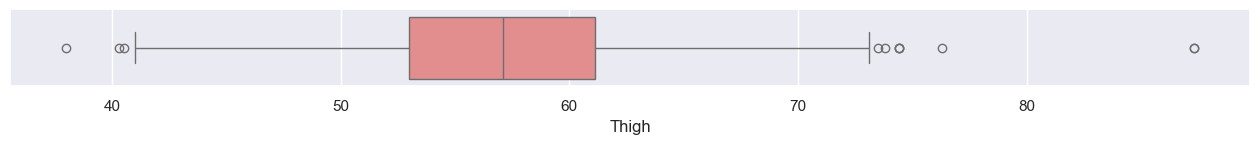

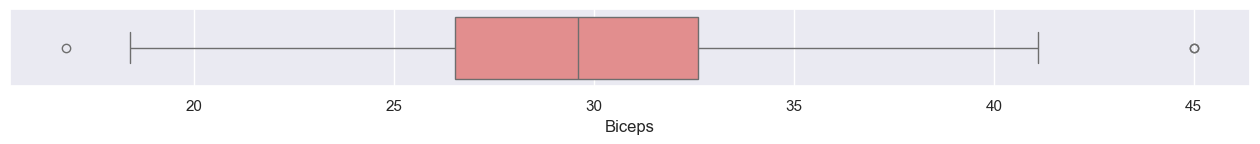

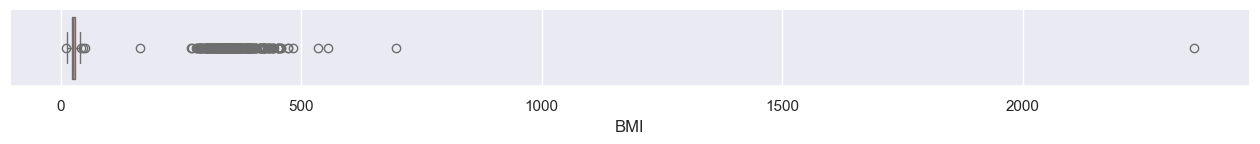

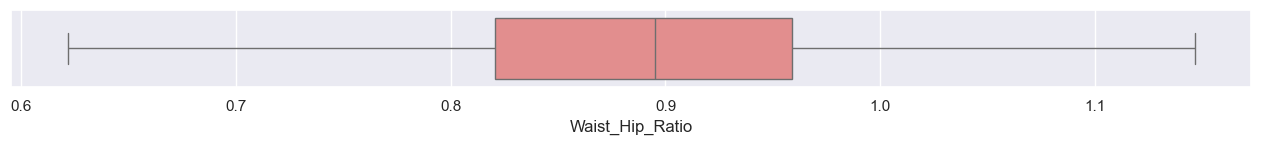

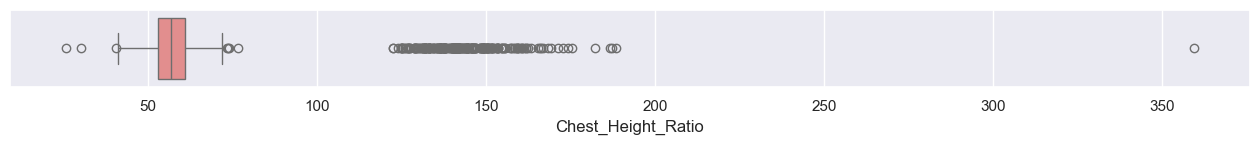

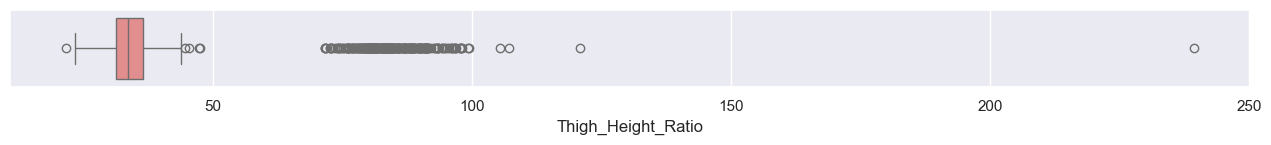

In [1627]:
for column in df:
    plt.figure(figsize=(16,1))
    sns.boxplot(data=df,x=column,color='lightcoral')

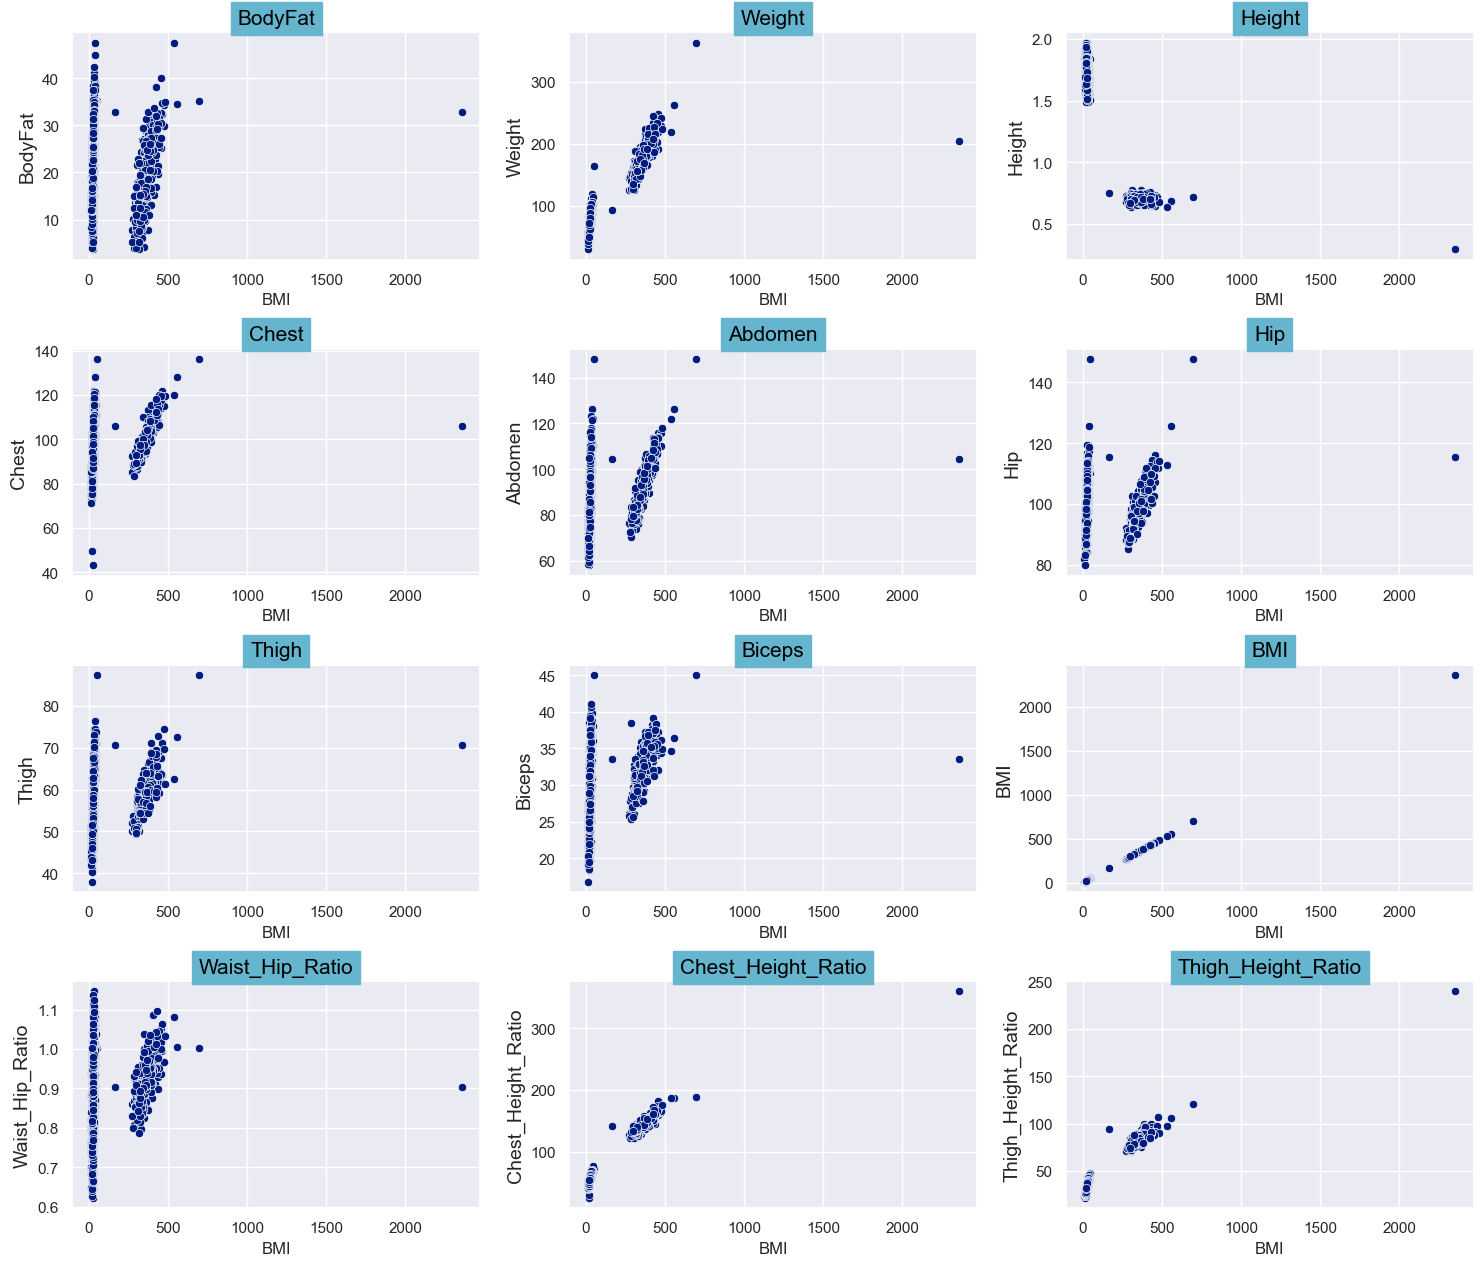

In [1628]:
sns.set_palette('dark')
plt.figure(figsize=(15,25))
for idx , i in enumerate (df):
    plt.subplot(8, 3, idx + 1)
    sns.scatterplot(x =df['BMI'], y=df[i] , data = df)
    plt.title(i,backgroundcolor='c',color='black',fontsize=15)
    plt.xlabel('BMI' , size = 12)
    plt.ylabel(i , size = 14)
plt.tight_layout()                     
plt.show()

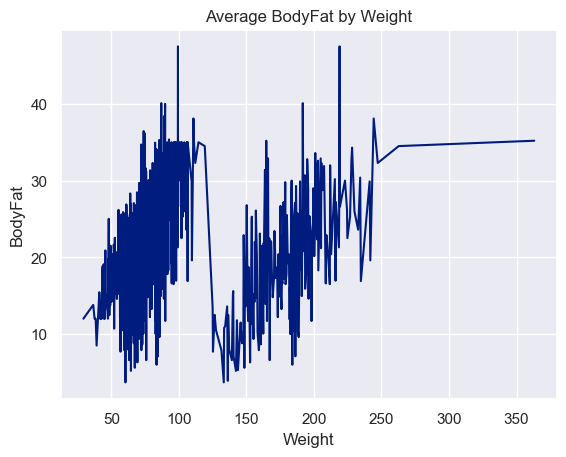

In [1629]:
avg_bodyfat_age = df.groupby('Weight')['BodyFat'].mean().reset_index()
sns.lineplot(data=avg_bodyfat_age, x='Weight', y='BodyFat')
plt.title('Average BodyFat by Weight')
plt.show()

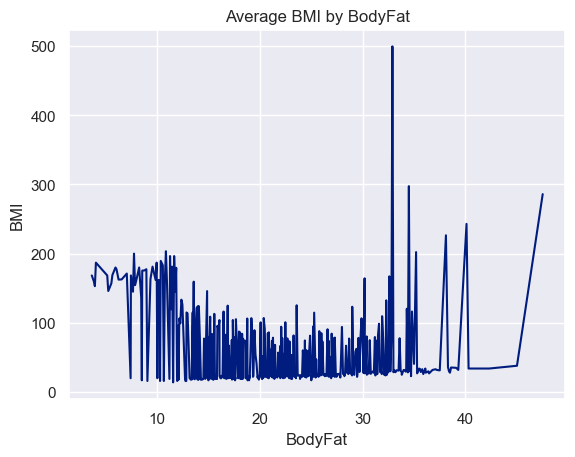

In [1630]:
avg_BodyFat_age = df.groupby('BodyFat')['BMI'].mean().reset_index()
sns.lineplot(data=avg_BodyFat_age, x='BodyFat', y='BMI')
plt.title('Average BMI by BodyFat')
plt.show()

Text(29.5, 37, 'BMI>29.5')

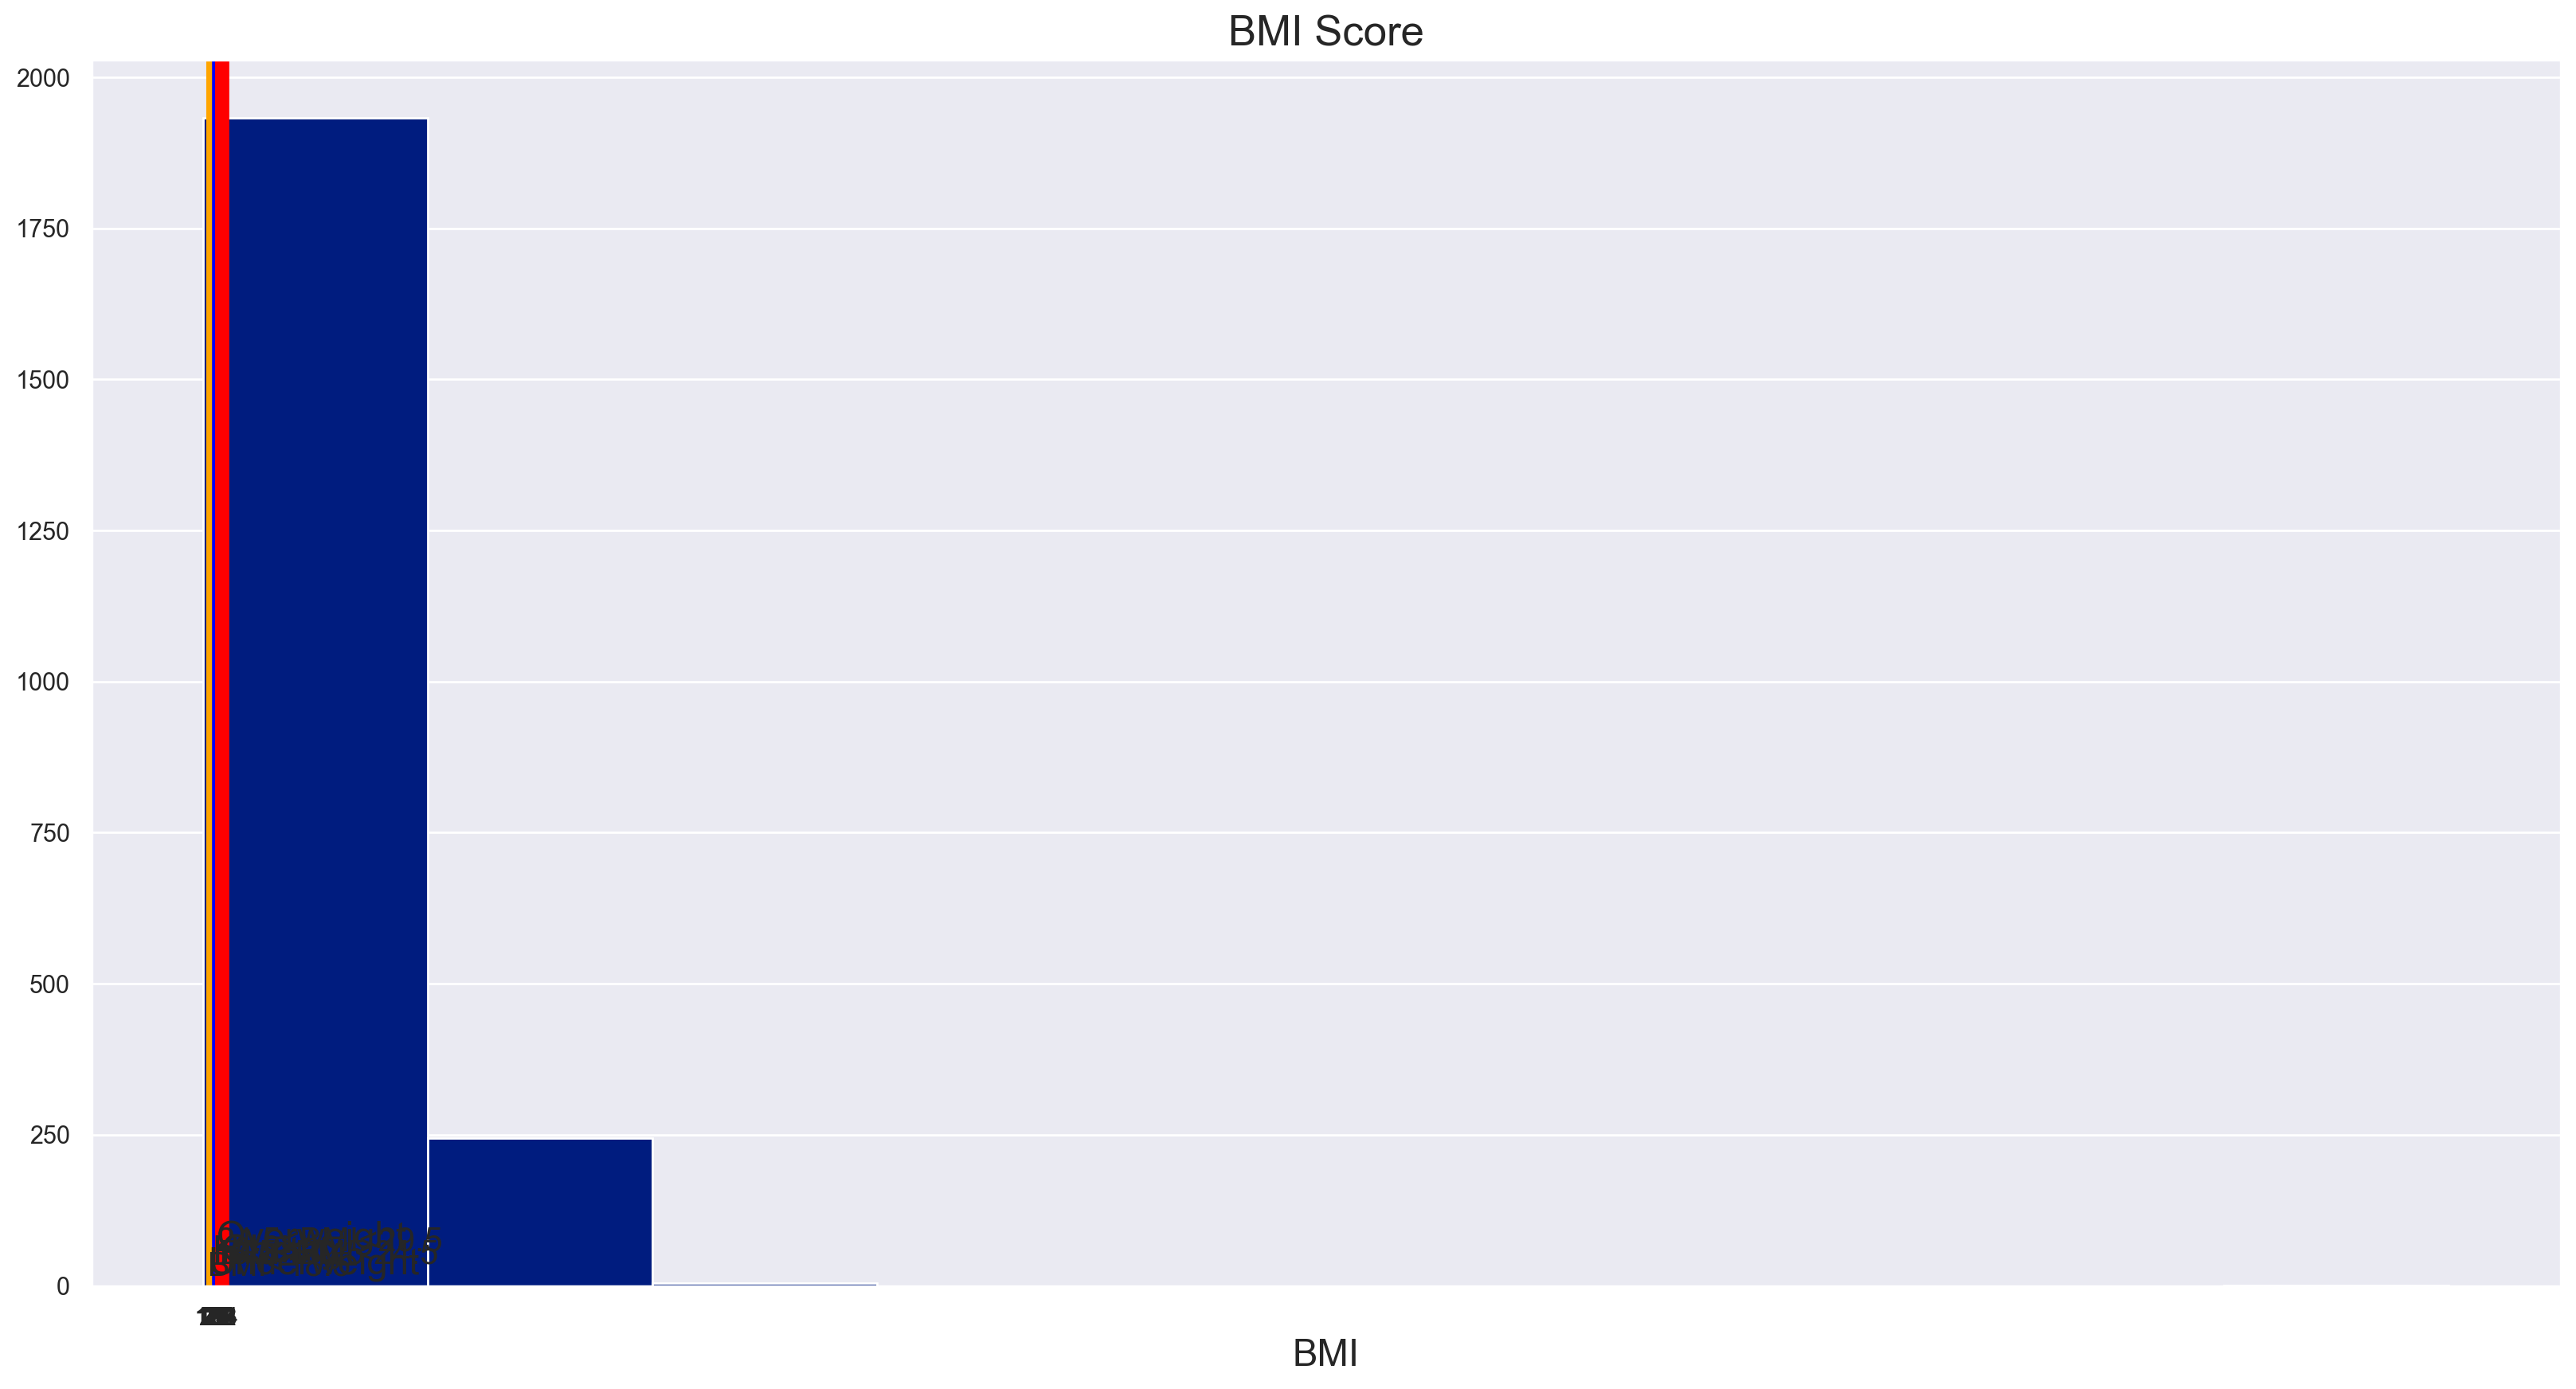

In [1631]:
plt.figure(figsize=(20,10), dpi=200)
plt.hist(df['BMI'])
plt.xticks(np.arange(15,35,1))
plt.title('BMI Score',fontsize=19)
plt.xlabel('BMI', fontsize=17)

plt.axvline(x=18.5, color = 'orange', lw=4)
plt.text(16,20, 'Underweight', fontsize=17)
plt.text(16,17, 'BMI<18.5',fontsize=15)

plt.axvline(x=22, color = 'blue', lw=2)
plt.text(20,40, 'Healthy', fontsize=17)
plt.text(20,37, '18.5<BMI<24.5',fontsize=15)

plt.axvline(x=27, color = 'red', lw=4)
plt.text(24.5,62, 'Overweight', fontsize=17)
plt.text(24.5,58, '24.5<BMI<29.5',fontsize=15)

plt.axvline(x=31, color = 'red', lw=6)
plt.text(29.5,40, 'Obesity', fontsize=17)
plt.text(29.5,37, 'BMI>29.5',fontsize=15)

In [1632]:
target = 'BodyFat'
X = df.drop(columns=[target])
y = df[target]

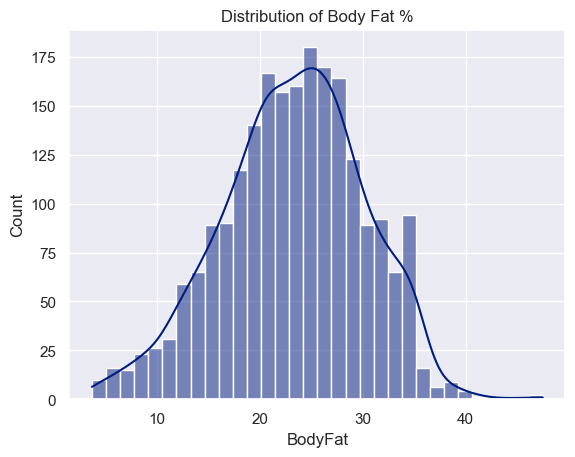

In [1633]:
sns.histplot(y, kde=True)
plt.title("Distribution of Body Fat %")
plt.show()

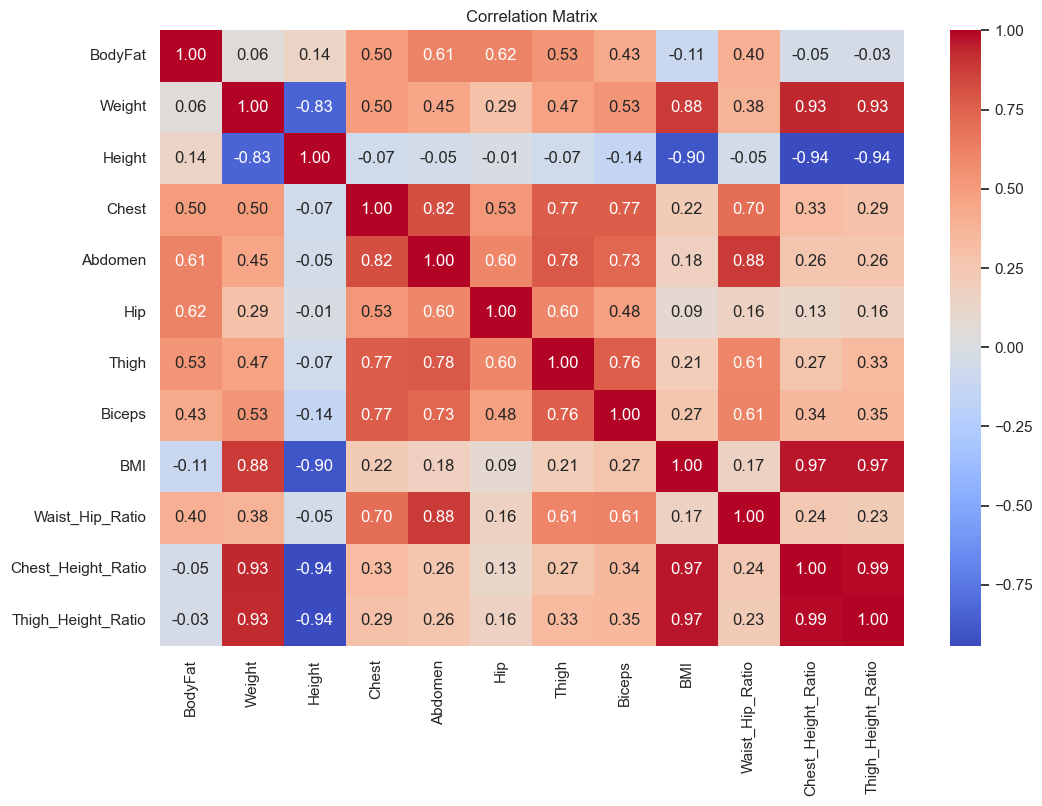

In [1634]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

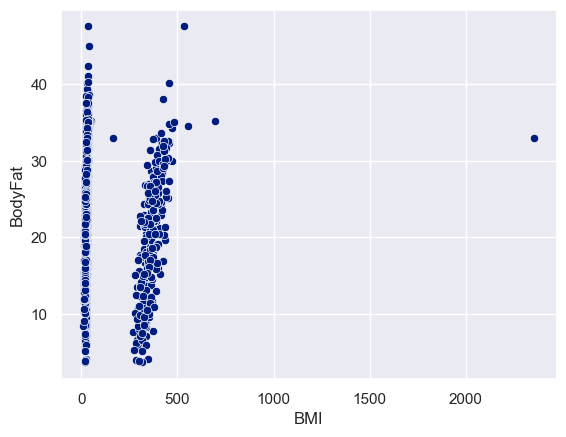

In [1635]:
# Scatter plots لبعض الخصائص
sns.scatterplot(x='BMI', y=y, data=df)
plt.show()

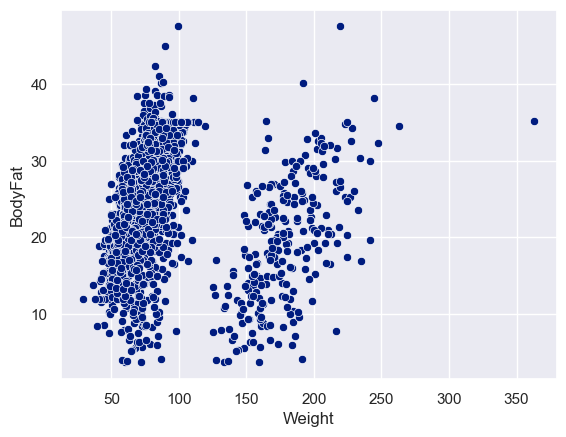

In [1636]:
sns.scatterplot(x='Weight', y=y, data=df)
plt.show()

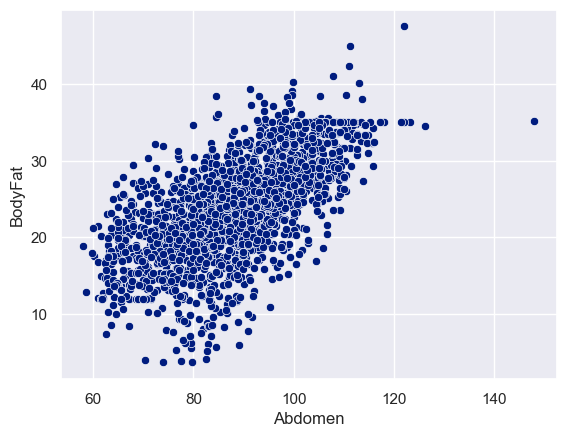

In [1637]:
sns.scatterplot(x='Abdomen', y=y, data=df)
plt.show()

# Augmentation on data

In [1638]:
def augment_data(X, y, n_augments=2, noise_level=0.01):
    X_aug, y_aug = [X.copy()], [y.copy()]
    for _ in range(n_augments):
        X_noisy = X + np.random.normal(0, noise_level * X.std(), X.shape)
        X_aug.append(X_noisy)
        y_aug.append(y)
    X_new = pd.concat([pd.DataFrame(x) for x in X_aug])
    y_new = pd.concat([pd.Series(yy) for yy in y_aug])
    return X_new, y_new

X, y = augment_data(X, y, n_augments=3, noise_level=0.02)
print("Augmented Dataset Shape:", X.shape)

Augmented Dataset Shape: (8728, 11)


# Data Splitting & Scaling

In [1639]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [1640]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

# Model Creation & Training

In [ ]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_mse, val_mse = [], []

for train_index, val_index in kf.split(X_train_scaled):
    X_train, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]

    # -------------------------------
    cat_model = CatBoostRegressor(
        iterations=500,
        learning_rate=0.05,
        depth=5,
        verbose=0,
        random_seed=42
    )
    cat_model.fit(X_train, y_train)

    y_pred_train = cat_model.predict(X_train)
    y_pred_val = cat_model.predict(X_val)

    train_mse.append(mean_squared_error(y_train, y_pred_train))
    val_mse.append(mean_squared_error(y_val, y_pred_val))

print("Train MSE:", train_mse)
print("Validation MSE:", val_mse)

Train MSE: [7.07299383427952, 7.182572056584363, 7.151569023351637, 6.977426583562808, 7.077691896289566]
Validation MSE: [9.194634690817411, 9.318392906182073, 8.50353701649887, 8.750499072389506, 9.661194632237434]


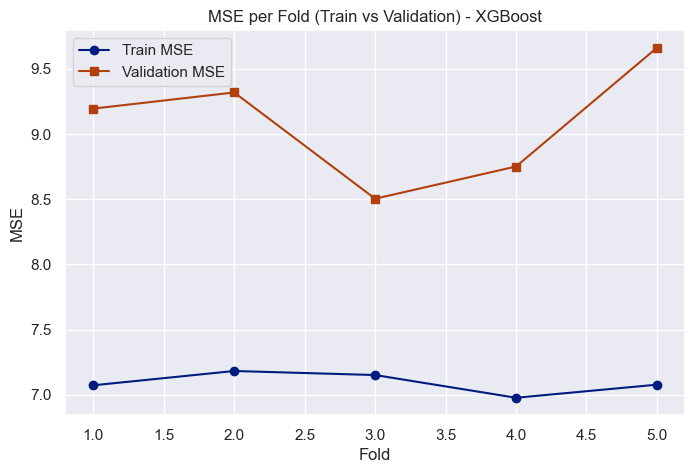


Average Train MSE: 7.092450678813579
Average Validation MSE: 9.08565166362506


In [ ]:
# MSE for Fold
plt.figure(figsize=(8,5))
plt.plot(range(1, len(train_mse)+1), train_mse, marker='o', label="Train MSE")
plt.plot(range(1, len(val_mse)+1), val_mse, marker='s', label="Validation MSE")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.title("MSE per Fold (Train vs Validation) - XGBoost")
plt.legend()
plt.show()

print("\nAverage Train MSE:", np.mean(train_mse))
print("Average Validation MSE:", np.mean(val_mse))

In [ ]:
# train model on all data of training
final_cat = CatBoostRegressor(
    iterations=100000,
    learning_rate=0.05,
    depth=5,
    verbose=0,
    random_seed=42
)
final_cat.fit(X_train_scaled, y_train_full)

In [ ]:
y_pred = final_cat.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest Set Metrics - CatBoost Regression:")
print(f"MSE: {mse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"EVS: {evs:.6f}")
print(f"R^2: {r2:.6f}")


Test Set Metrics - CatBoost Regression:
MSE: 1.480128
MAE: 0.849408
EVS: 0.968920
R^2: 0.968916


In [1645]:
results = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred
})
print("\nActual vs Predicted (first 20 rows):")
print(results.head(20))


Actual vs Predicted (first 20 rows):
      Actual Values  Predicted Values
1063           24.0         23.650524
1881           28.5         28.370972
1816           20.0         21.511245
1242           19.3         21.050636
753            24.2         24.628624
79             18.8         21.808076
1747           19.1         19.506958
80             31.4         30.318710
1649           41.0         40.898122
659             5.2          6.382935
1141           28.7         28.427801
107            18.3         17.195924
43             32.0         31.521965
1743           20.3         20.789004
1756           18.6         19.543700
241            35.0         36.834060
2040           17.5         16.654304
909            15.2         14.843101
70             24.3         21.729507
1094           25.6         26.302784


In [ ]:
with open("BestModel.pkl", "wb") as file:
    pickle.dump(final_cat, file)

print("✅ Model saved successfully as model.pkl")

✅ Model saved successfully as model.pkl
